In [1]:
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
import matplotlib as mpl

In [3]:
from matplotlib import pyplot as plt

In [4]:
plt.rc('font', family='serif', serif='Palatino', size=8)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

In [5]:
import numpy as np
from py_hawkesn_sir.py_hawkesn_sir.hawkesn_seir_parallelizable import *

# Intensity of a HawkesN Process

## Calculation

In [6]:
his = np.array([0, 1, 2])
scale = decay = 0.5
n = 100

In [7]:
beta = 1
sigma = .5
gamma = .3

In [8]:
int_fun = exp_intensity(beta=beta,
                        sigma=sigma,
                        gamma=gamma,
                        n=n,
                        history=his)
int_fun(1), int_fun(1.1), int_fun(2)

(array([0.32900452]), array([0.39491558]), array([0.76440791]))

In [9]:
int_fun_less = exp_intensity(beta=beta,
                             sigma=sigma,
                             gamma=gamma,
                             n=n,
                             history=his,
                             sum_less_equal=False)
int_fun_less(1), int_fun_less(1.1), int_fun_less(2)

(array([0.32900452]), array([0.39491558]), array([0.76440791]))

with $\gamma = \sigma$:

In [10]:
int_fun_eq = exp_intensity(beta=beta,
                        sigma=sigma,
                        gamma=sigma,
                        n=n,
                        history=his)
int_fun_eq(1), int_fun_eq(1.1), int_fun_eq(2)

(array([0.29720002]), array([0.35758619]), array([0.65101043]))

In [11]:
int_fun_less_eq = exp_intensity(beta=beta,
                             sigma=sigma,
                             gamma=sigma,
                             n=n,
                             history=his,
                             sum_less_equal=False)
int_fun_less_eq(1), int_fun_less_eq(1.1), int_fun_less_eq(2)

(array([0.29720002]), array([0.35758619]), array([0.65101043]))

In [12]:
ti = 2
h_u_t = np.array([0])
np.exp(-gamma * (ti - h_u_t))

array([0.54881164])

/home/akarakas/opt/python-3.7.2/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


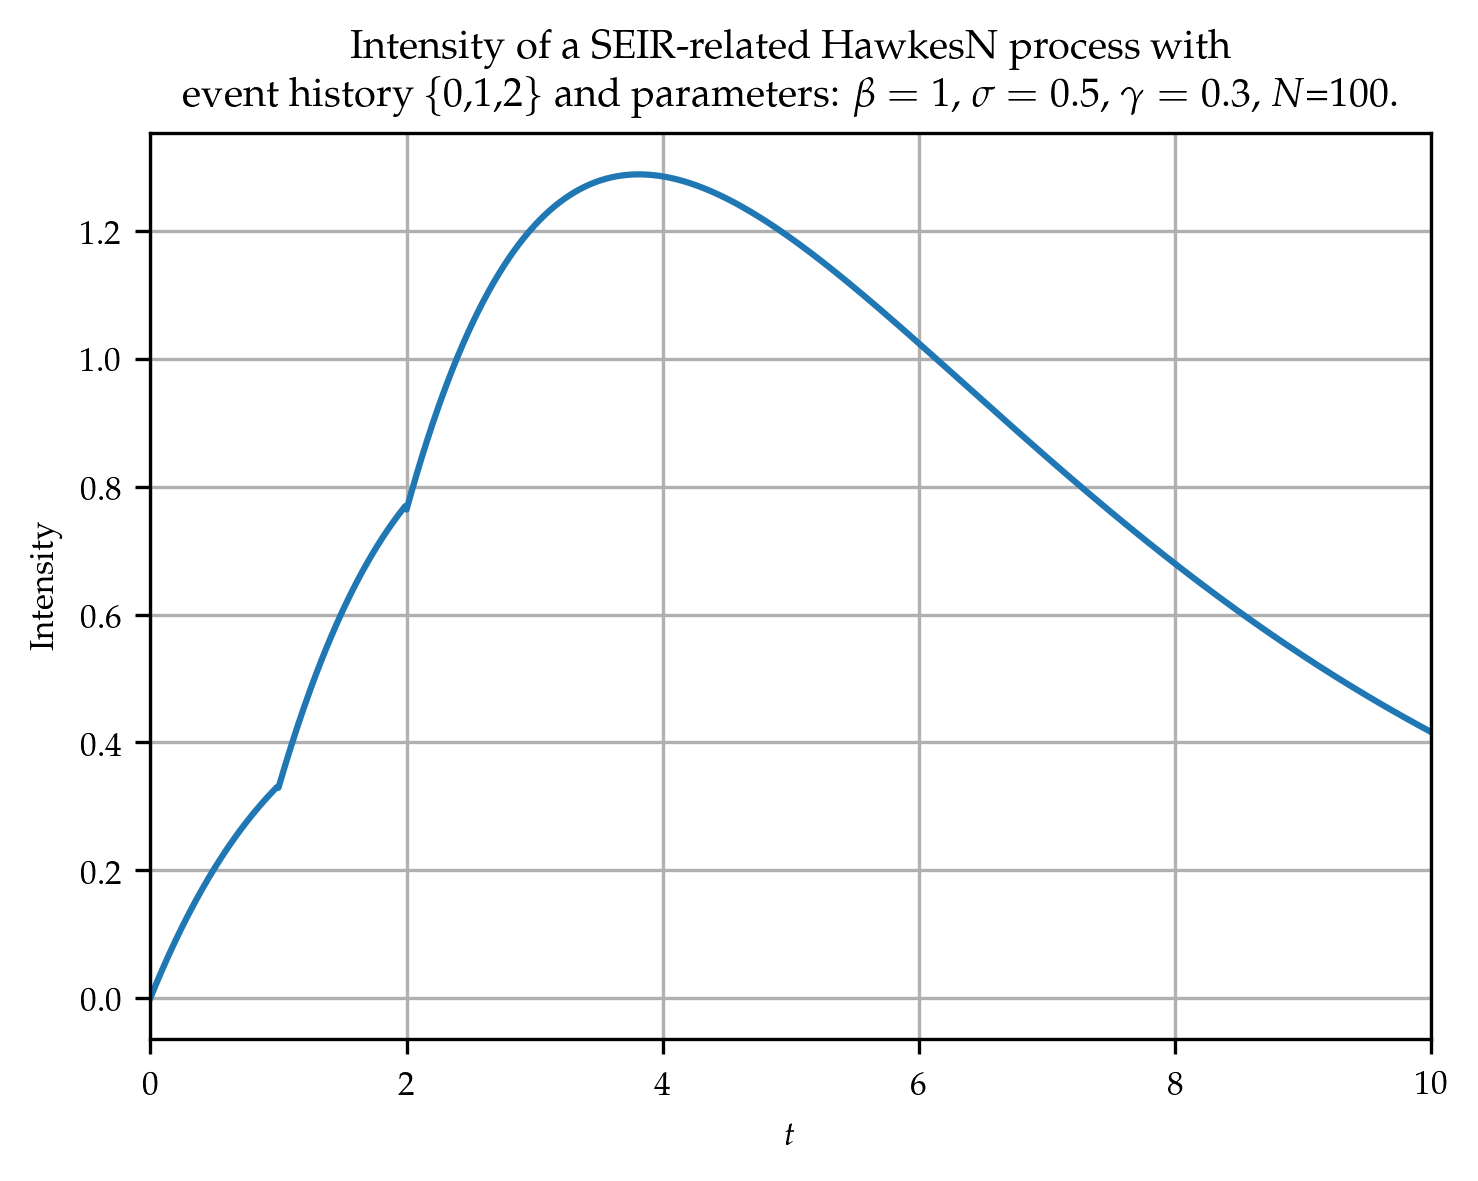

In [13]:
plot_exp_intensity(t_max=10, beta=beta, sigma=sigma, gamma=gamma, n=100, history=his, fname="seir_int")

with $\gamma = \sigma$:

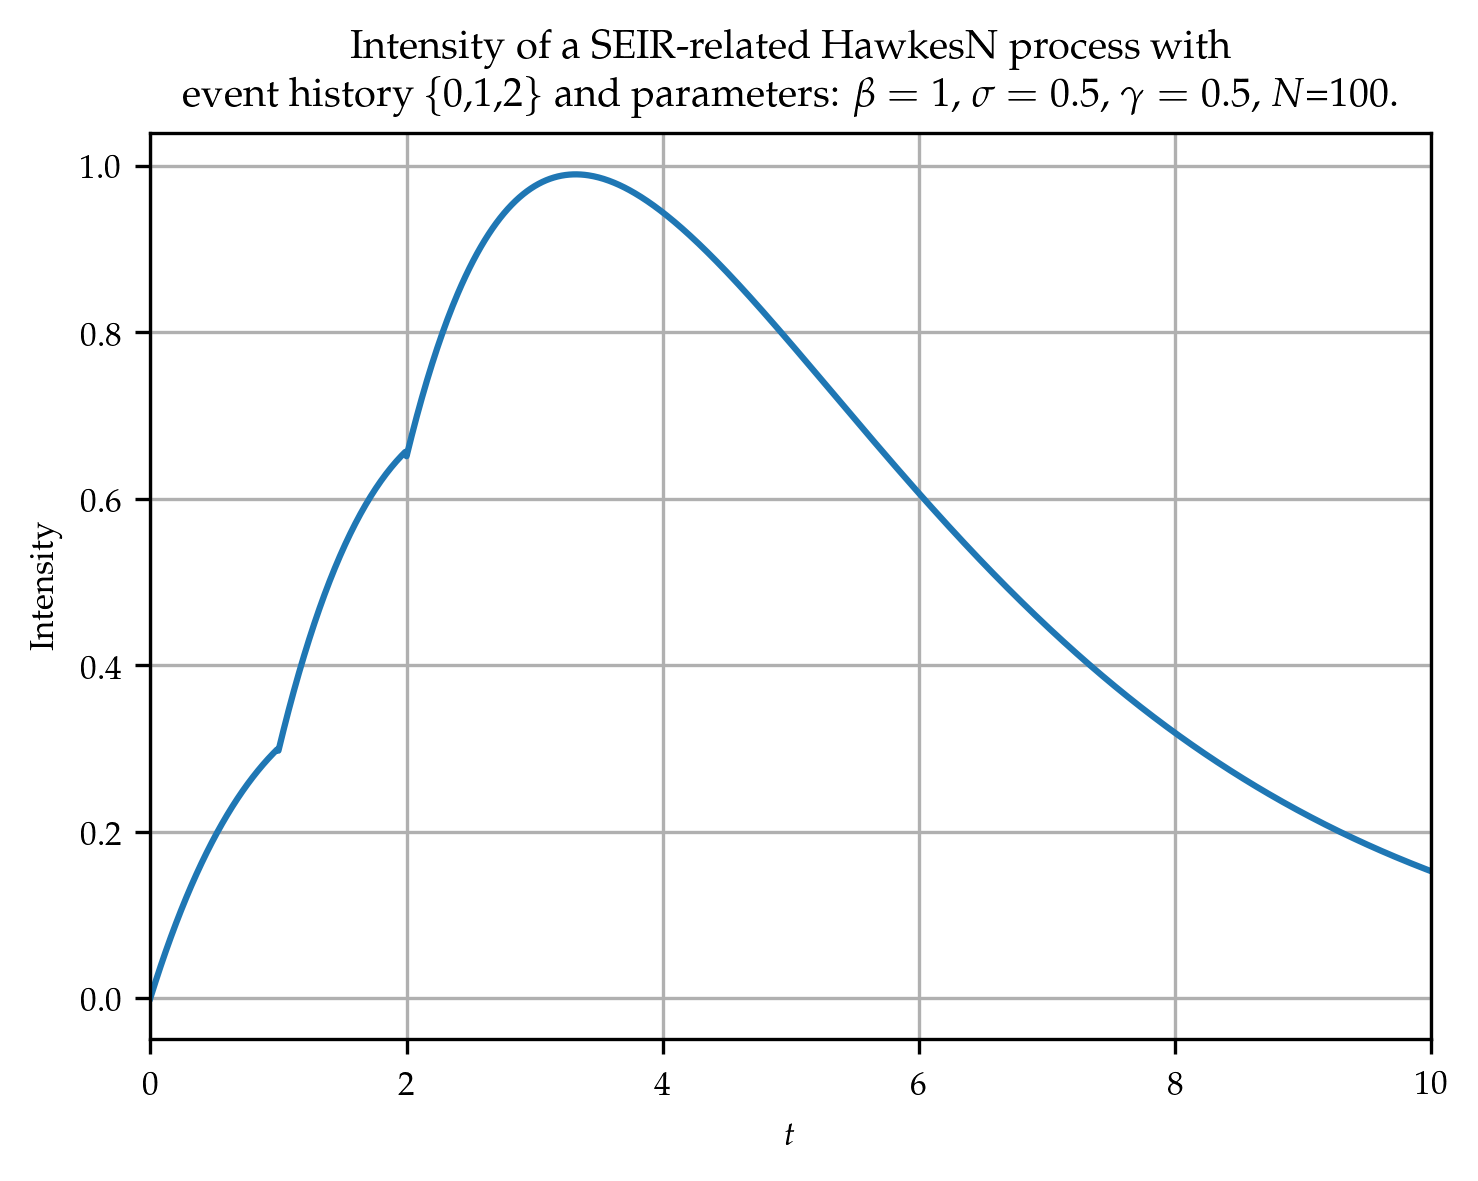

In [14]:
plot_exp_intensity(t_max=10, beta=beta, sigma=sigma, gamma=sigma, n=100, history=his)

# Log-Likelihood of a SEIR-Related HawkesN Process

## Calculation of the Log-Likelihood

In [15]:
llf(beta=beta, sigma=sigma, gamma=gamma, n=n , history=his)

-2.158228176257924

In [16]:
llf(beta=beta, sigma=sigma, gamma=gamma, n=n , history=his,
    sum_less_equal=False)

-2.158228176257924

with $\gamma = \sigma$:

In [17]:
llf(beta=beta, sigma=sigma, gamma=sigma, n=n , history=his)

0.2516939198946918

In [18]:
llf(beta=beta, sigma=sigma, gamma=sigma, n=n , history=his,
    sum_less_equal=False)

0.2516939198946918

## Calculation of the Gradient

In [19]:
dllf_dbeta_sigma_neq_gamma(
    beta=beta, sigma=sigma, gamma=gamma,
    n=n, history=his)

1.222109321407785

In [20]:
dllf_dbeta_sigma_eq_gamma(
    beta=beta, gamma=gamma,
    n=n, history=his)

1.4798989847093478

In [21]:
dllf_dsigma_sigma_neq_gamma(
    beta=beta, sigma=sigma, gamma=gamma,
    n=n, history=his)

1.6260108599855299

In [22]:
dllf_dgamma_sigma_neq_gamma(
    beta=beta, sigma=sigma, gamma=gamma,
    n=n, history=his)

-0.904187231105778

In [23]:
dllf_dgamma_sigma_eq_gamma(
    beta=beta, gamma=gamma,
    n=n, history=his)

2.9185449768548994

In [24]:
dllf_dn_sigma_neq_gamma(
    beta=beta, sigma=sigma, gamma=gamma,
    n=n, history=his)

0.0003742497895322416

In [25]:
dllf_dn_sigma_eq_gamma(
    beta=beta, gamma=gamma,
    n=n, history=his)

0.00041978029063089773

In [26]:
from py_hawkesn_sir.py_hawkesn_sir.hawkesn_seir_sympy import HawkesN
from sympy import Array
params_neq = [("beta", beta), ("sigma", sigma), ("gamma", gamma), ("n", n)]
hn_sym = HawkesN(Array(his))
hn_sym.llf_sigma_neq_gamma().subs(params_neq)

-2.15822817625792

In [27]:
params_eq = [("beta", beta), ("gamma", sigma), ("n", n)]
hn_sym.llf_sigma_eq_gamma().subs(params_eq)

-2.33909603776590

In [28]:
hn_sym.llf_gradient_sigma_neq_gamma().subs(params_neq)

[1.22210932140778, 1.62601085998553, -0.904187231105777, 0.000374249789532242]

In [29]:
hn_sym.llf_gradient_sigma_eq_gamma().subs(params_eq)

[1.30348346873858, 0.802343061892895, 0.000389622734019469]

In [30]:
import py_hawkesn_sir.py_hawkesn_sir.hawkesn_seir_sympy_parallelizable as hp_sym

In [31]:
hp_sym.llf_sigma_neq_gamma(Array(his)).subs(params_neq)

-2.15822817625792

In [32]:
params_eq = [("beta", beta), ("gamma", sigma), ("n", n)]
hn_sym.llf_sigma_eq_gamma(Array(his)).subs(params_eq)

-2.33909603776590

In [33]:
hn_sym.llf_gradient_sigma_neq_gamma(Array(his)).subs(params_neq)

[1.22210932140778, 1.62601085998553, -0.904187231105777, 0.000374249789532242]

In [34]:
hn_sym.llf_gradient_sigma_eq_gamma(Array(his)).subs(params_eq)

[1.30348346873858, 0.802343061892895, 0.000389622734019469]

# Fitting

## Using the L-BFGS Algorithm

In [35]:
from concurrent import futures
from itertools import repeat

from py_hawkesn_sir.py_hawkesn_sir.seir_stochastic \
    import StochasticSEIR

In [36]:
s_0 = 1000
e_0 = 0
i_0 = 300
r_0 = 0

In [37]:
ratios = [5, 4, 3, 2, 1, 1/2, 1/3, 1/4, 1/5]
adjustments = [(1-0.2*r) / (1+r) for r in ratios]
betas = [round(1-adj, 2) for adj in adjustments]
gammas = list(reversed(betas))
ratios = [round(r, 2) for r in ratios]
betas, gammas

([1.0, 0.96, 0.9, 0.8, 0.6, 0.4, 0.3, 0.24, 0.2],
 [0.2, 0.24, 0.3, 0.4, 0.6, 0.8, 0.9, 0.96, 1.0])

### Fit with $\kappa$ & $\theta$ known

#### Fit

In [38]:
t_max = 11
times = np.arange(1, t_max+1)
n_simulations = 20
random_state = 0
sigma = 5

In [39]:
dir_name = "heatmap_seir_hawkesn"

In [40]:
for b_ind in range(len(betas)):
  # simulate SEIR model
  model = StochasticSEIR(s_0=s_0,
                         e_0=e_0,
                         i_0=i_0,
                         r_0=r_0,
                         beta=betas[b_ind],
                         sigma=sigma,
                         gamma=gammas[b_ind])
  model.simulate(t_max=t_max,
                 n_simulations=n_simulations,
                 random_state=random_state)
  # fit HawkesN process
  for t in reversed(times):
    events = model.infection_times(until=t)    
    with futures.ProcessPoolExecutor() as executor:
      res = executor.map(fit_sigma_neq_gamma,
        events,  # simulations per parameter comb.
        repeat(betas[b_ind]),  # initial beta
        repeat(sigma),  # initial sigma
        repeat(gammas[b_ind]),  # initial gamma
        [len(e) + .5 for e in events],  # n_start (+ .5
                                        # to avoid start
                                        # at bound)
        repeat(True)  # scale_decay_fixed
      )
    res = list(res)

    fname = dir_name + "/n_only_sim_beta" + str(betas[b_ind]) 
    fname += "_gamma" + str(gammas[b_ind])
    fname = (fname + "_t_max"+str(t)).replace(".", "")
    fname += ".py"
    with open(fname, "w") as file:
      file.write("from numpy import array\n" +
                 "from math import inf\n"
                 "result = " + repr(res))

In [41]:
import importlib
from statistics import median
from copy import deepcopy

#### Calculate Medians and Quantiles

In [42]:
from math import inf

In [43]:
res = [[None for _ in range(len(times))]
       for __ in range(len(betas))]
res_mean = deepcopy(res)
res_median = deepcopy(res)
res_85_percentile = deepcopy(res)
res_15_percentile = deepcopy(res)

for i in range(len(betas)):
    for j, t in enumerate(times):
        #print(betas[i], t)
        fname = (dir_name + "/n_only_sim_beta" + str(betas[i]) + "_"
                 + "gamma" + str(gammas[i]) + "_"
                 + "t_max" + str(t)).replace(".", "").replace("/", ".")
        result_module = importlib.import_module(fname)
        results_sims = [result_module.result[k][0][0]
                        for k in range(len(result_module.result))]
        res_median[i][j] = median(results_sims)
        res_85_percentile[i][j] = np.percentile(results_sims, 85, interpolation="nearest")
        res_15_percentile[i][j] = np.percentile(results_sims, 15, interpolation="nearest")

In [44]:
result_module.result

[(array([11864406.65418954]),
  array([-20558092.62055157]),
  {'grad': array([-8.98876261e-06]),
   'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
   'funcalls': 50,
   'nit': 49,
   'warnflag': 0}),
 (array([10346903.77282552]),
  array([-3603658.79069626]),
  {'grad': array([-8.21984616e-06]),
   'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
   'funcalls': 50,
   'nit': 49,
   'warnflag': 0}),
 (array([13212545.46312664]),
  array([-22917325.4469266]),
  {'grad': array([-9.62518339e-06]),
   'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
   'funcalls': 50,
   'nit': 49,
   'warnflag': 0}),
 (array([10067859.29861607]),
  array([-3302868.58153819]),
  {'grad': array([-8.06766864e-06]),
   'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
   'funcalls': 50,
   'nit': 49,
   'warnflag': 0}),
 (array([9884477.96805183]),
  array([7015050.56227807]),
  {'grad': array([-7.94894181e-06]),
   'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRAD

#### Plot Heatmap

In [48]:
mpl.rcParams["text.usetex"] = False

/home/akarakas/opt/python-3.7.2/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


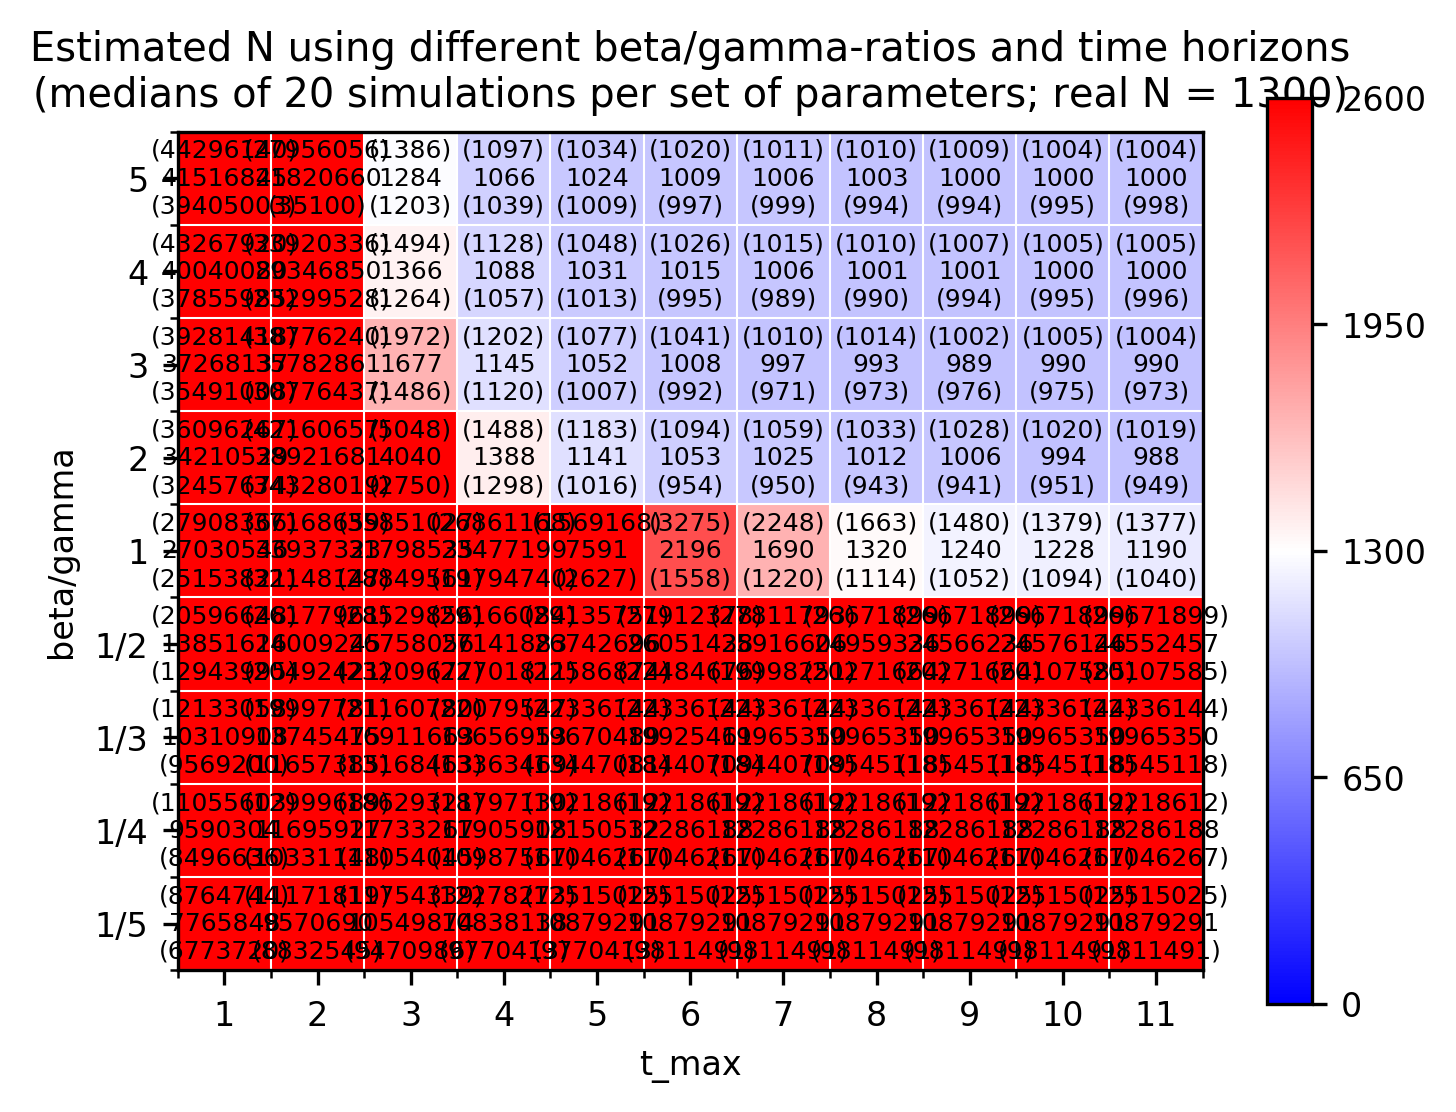

In [49]:
upper_bound_colormap = 2 * 1300

fig = plt.figure(dpi=300, figsize=(5.51, 4))
ax = fig.gca()
ax.set_title(
  r"Estimated N using different beta/gamma" +
  "-ratios and time horizons\n(medians of " +
  str(n_simulations) + " simulations per set of " +
  "parameters; real N = 1300)")
color_norm = mpl.colors.Normalize(
  vmin=0, vmax=upper_bound_colormap)
im = ax.imshow(res_median, cmap='bwr', norm=color_norm)

# We want to show all ticks...
ax.set_xticks(range(t_max))
ax.set_yticks(range(len(betas)))
# ... and label them with the respective list entries
ax.set_xticklabels(range(1, t_max+1))
ratio_ints = [str(round(betas[i]/gammas[i]))
              for i in range(len(betas)//2)]
ratio_ticks = ratio_ints + ["1"] + \
              ["1/"+r for r in  ratio_ints[::-1]]
ax.set_yticklabels(ratio_ticks)

ax.set_xlabel(r"t_max")
ax.set_ylabel(r"beta/gamma")

ax.set_xticks(np.arange(len(times)+1)-.5, minor=True)
ax.set_yticks(np.arange(len(betas)+1)-.5, minor=True)
ax.grid(which="minor", color="white", linestyle="-", linewidth=.5)

# Loop over data dimensions and create text annotations.
for i in range(len(betas)):
  for j in range(t_max):
    text = ax.text(
      j, i,
      "(" + str(int(round(res_85_percentile[i][j]))) +
      ")" + "\n" +
      str(int(round(res_median[i][j]))) +
      "\n" +
      "(" + str(int(round(res_15_percentile[i][j]))) +
      ")",
      ha="center", va="center", color="black", size=6)
plt.colorbar(
  im, ticks=np.linspace(0, upper_bound_colormap, 5),
  boundaries=np.arange(upper_bound_colormap+1))
plt.savefig(dir_name + "heatmap_n_only.pdf")

### Fit all 4 Parameters

#### Fit

In [50]:
for b_ind in range(len(betas)):
  # simulate SEIR model
  model = StochasticSEIR(s_0=s_0,
                         e_0=e_0,
                         i_0=i_0,
                         r_0=r_0,
                         beta=betas[b_ind],
                         sigma=sigma,
                         gamma=gammas[b_ind])
  model.simulate(t_max=t_max,
                 n_simulations=n_simulations,
                 random_state=random_state)
  # fit HawkesN process
  for t in reversed(times):
    events = model.infection_times(until=t)    
    with futures.ProcessPoolExecutor() as executor:
      res = executor.map(fit_sigma_neq_gamma,
        events,  # simulations per parameter comb.
        repeat(betas[b_ind]),  # initial beta
        repeat(sigma),  # initial sigma
        repeat(gammas[b_ind]),  # initial gamma
        [len(e) + .5 for e in events],  # n_start (+ .5
                                        # to avoid start
                                        # at bound)
      )
    res = list(res)

    fname = dir_name + "/sim_beta" + str(betas[b_ind]) 
    fname += "_gamma" + str(gammas[b_ind])
    fname = (fname + "_t_max"+str(t)).replace(".", "")
    fname += ".py"
    with open(fname, "w") as file:
      file.write("from numpy import array\n" +
                 "from math import inf\n" +
                 "from numpy import nan\n"
                 "result = " + repr(res))

/home/akarakas/sir_hawkes/py_hawkesn_sir/py_hawkesn_sir/hawkesn_seir_parallelizable.py:613: RuntimeWarning: invalid value encountered in double_scalars
  addend_sum += numerator / denominator
/home/akarakas/sir_hawkes/py_hawkesn_sir/py_hawkesn_sir/hawkesn_seir_parallelizable.py:613: RuntimeWarning: invalid value encountered in double_scalars
  addend_sum += numerator / denominator
/home/akarakas/sir_hawkes/py_hawkesn_sir/py_hawkesn_sir/hawkesn_seir_parallelizable.py:613: RuntimeWarning: invalid value encountered in double_scalars
  addend_sum += numerator / denominator
/home/akarakas/sir_hawkes/py_hawkesn_sir/py_hawkesn_sir/hawkesn_seir_parallelizable.py:613: RuntimeWarning: invalid value encountered in double_scalars
  addend_sum += numerator / denominator
/home/akarakas/sir_hawkes/py_hawkesn_sir/py_hawkesn_sir/hawkesn_seir_parallelizable.py:613: RuntimeWarning: invalid value encountered in double_scalars
  addend_sum += numerator / denominator
/home/akarakas/sir_hawkes/py_hawkesn_sir

for b_ind in range(len(betas)):
  # simulate SIR model
  print("\n"*2, ("#"*80+"\n")*2, sep="")
  print("SIMULATE WITH")
  print("beta:", betas[b_ind])
  print("gamma:", gammas[b_ind])
  model = StochasticSEIR(s_0=s_0,
                         i_0=i_0,
                         r_0=r_0,
                         beta=betas[b_ind],
                        gamma=gammas[b_ind])
  model.simulate(t_max=t_max,
                 n_simulations=n_simulations,
                 random_state=random_state)

  for t in reversed(times):
    events = model.infection_times(until=t)    
    with futures.ProcessPoolExecutor() as executor:
      res = executor.map(fit,
                         events,  # list of simulations for one set of parameters
                         repeat(1),  # initial scale
                         repeat(.1),  # initial decay
                         [len(e) + .5 for e in events]  # n_start (+ .5 to avoid
                                                        # start at bound)
                         )
    res = list(res)

    fname = "heatmap_results_hawkesn/p_p_sim_beta" + str(betas[b_ind]) + "_gamma" + str(gammas[b_ind])
    fname = (fname + "_t_max"+str(t)).replace(".", "") + ".py"
    with open(fname, "w") as file:
      file.write("from numpy import array\n" +
                 "result = " + repr(res))

#### Calculate Medians and Quantiles

In [51]:
from numpy import nan

In [52]:
res = [[None for _ in range(len(times))]
       for __ in range(len(betas))]
res_mean = deepcopy(res)
res_median = deepcopy(res)
res_85_percentile = deepcopy(res)
res_15_percentile = deepcopy(res)

for i in range(len(betas)):
    for j, t in enumerate(times):
        #print(betas[i], t)
        fname = (dir_name + "/sim_beta" + str(betas[i]) + "_"
                 + "gamma" + str(gammas[i]) + "_"
                 + "t_max" + str(t)).replace(".", "").replace("/", ".")
        result_module = importlib.import_module(fname)
        results_sims = [result_module.result[k][0][-1]
                        for k in range(len(result_module.result))]
        res_median[i][j] = median(results_sims)
        res_85_percentile[i][j] = np.percentile(results_sims, 85, interpolation="nearest")
        res_15_percentile[i][j] = np.percentile(results_sims, 15, interpolation="nearest")

In [53]:
result_module.result

[(array([ 0.2,  5. ,  1. , 59.5]),
  nan,
  {'grad': array([-2.81128839e+08,             nan,             nan, -4.90689930e+06]),
   'task': b'ABNORMAL_TERMINATION_IN_LNSRCH',
   'funcalls': 21,
   'nit': 0,
   'warnflag': 2}),
 (array([ 0.2,  5. ,  1. , 50.5]),
  nan,
  {'grad': array([-2.41237256e+08,             nan,             nan, -4.73056374e+06]),
   'task': b'ABNORMAL_TERMINATION_IN_LNSRCH',
   'funcalls': 21,
   'nit': 0,
   'warnflag': 2}),
 (array([ 0.2,  5. ,  1. , 67.5]),
  nan,
  {'grad': array([-3.16709468e+08,             nan,             nan, -5.04443109e+06]),
   'task': b'ABNORMAL_TERMINATION_IN_LNSRCH',
   'funcalls': 21,
   'nit': 0,
   'warnflag': 2}),
 (array([ 0.2,  5. ,  1. , 48.5]),
  nan,
  {'grad': array([-2.30062109e+08,             nan,             nan, -4.69273723e+06]),
   'task': b'ABNORMAL_TERMINATION_IN_LNSRCH',
   'funcalls': 21,
   'nit': 0,
   'warnflag': 2}),
 (array([ 0.2,  5. ,  1. , 45.5]),
  nan,
  {'grad': array([-2.13060556e+08,            

#### Plot Heatmap

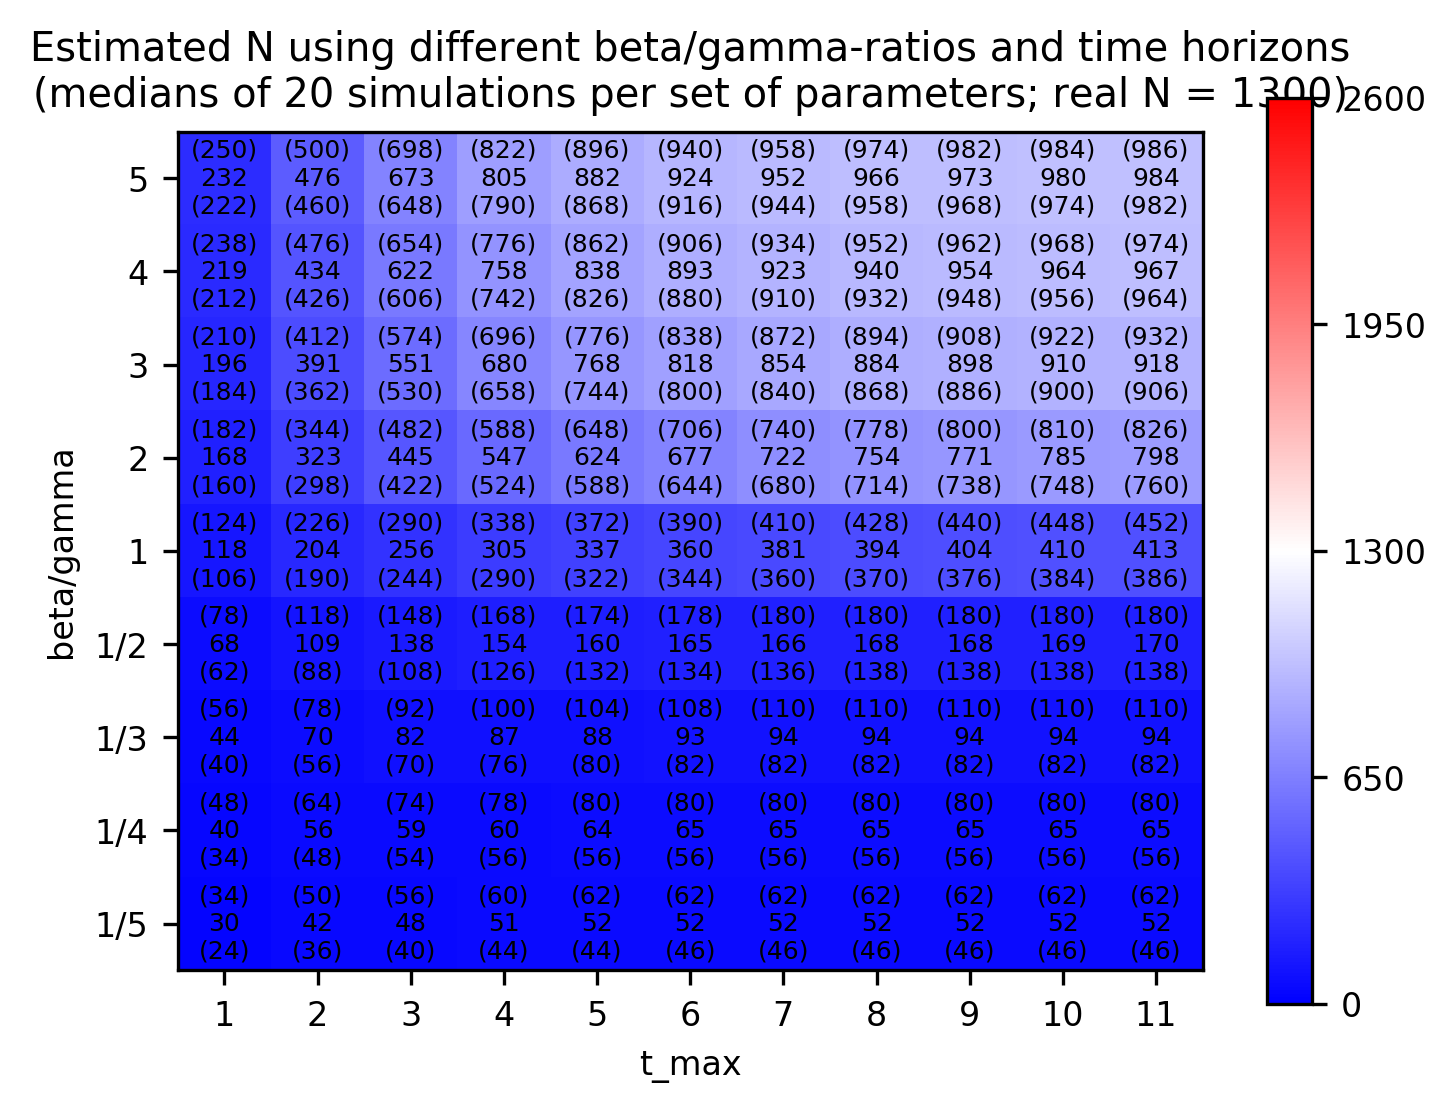

In [54]:
upper_bound_colormap = 2 * 1300

fig = plt.figure(dpi=300, figsize=(5.51, 4))
ax = fig.gca()
ax.set_title(
  r"Estimated N using different beta/gamma" +
  "-ratios and time horizons\n(medians of " +
  str(n_simulations) + " simulations per set of " +
  "parameters; real N = 1300)")
color_norm = mpl.colors.Normalize(
  vmin=0, vmax=upper_bound_colormap)
im = ax.imshow(res_median, cmap='bwr', norm=color_norm)

# We want to show all ticks...
ax.set_xticks(range(t_max))
ax.set_yticks(range(len(betas)))
# ... and label them with the respective list entries
ax.set_xticklabels(range(1, t_max+1))
ratio_ints = [str(round(betas[i]/gammas[i]))
              for i in range(len(betas)//2)]
ratio_ticks = ratio_ints + ["1"] + \
              ["1/"+r for r in  ratio_ints[::-1]]
ax.set_yticklabels(ratio_ticks)

ax.set_xlabel(r"t_max")
ax.set_ylabel(r"beta/gamma")

# Loop over data dimensions and create text annotations.
for i in range(len(betas)):
  for j in range(t_max):
    text = ax.text(
      j, i,
      "(" + str(int(round(res_85_percentile[i][j]))) +
      ")" + "\n" +
      str(int(round(res_median[i][j]))) +
      "\n" +
      "(" + str(int(round(res_15_percentile[i][j]))) +
      ")",
      ha="center", va="center", color="black", size=6)
plt.colorbar(
  im, ticks=np.linspace(0, upper_bound_colormap, 5),
  boundaries=np.arange(upper_bound_colormap+1))
plt.savefig(dir_name + "heatmap.pdf")